## Attrition Analysis
<hr>
### Exploratory Data Analysis


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Import data
empl = pd.read_csv("EmployeeIBMData.csv")
empl.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Check if any null values exist
empl.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

## Correlations
To get an overview of how the features are related to one another we created a correlation matrix on the continuous and ordinal variables. After visualizing the results on a heatmap we can observe that the majority of the data is uncorrelated, an advantageous attribute in creating our predictive model. The strongest correlated points in the data set are related to age, years in the workforce, and job level.


In [7]:
# Correlation Matrix
corr = empl.corr();
corr.head(26)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [8]:
# NaN values for StandardHour and EmployeeCount
empl = empl.drop('StandardHours', axis=1)
empl = empl.drop('EmployeeCount', axis=1)

In [9]:
corr = empl.corr();

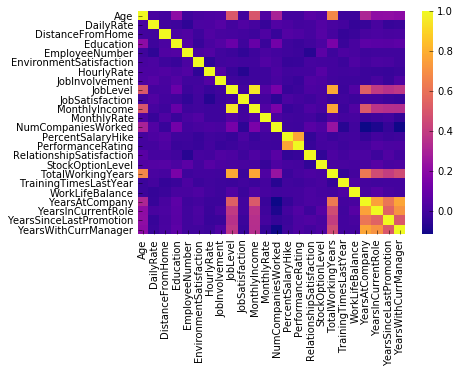

In [13]:
# plot the heatmap of feature correlation matrix
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

## Distributions
To analyze the distributions of the features in the dataset and their relationship to attrition we created several histogram and density plots.

In [382]:
from scipy import stats

In [591]:
attrYes = empl.loc[empl['Attrition'] == 'Yes']
attrNo = empl.loc[empl['Attrition'] == 'No']

In this sample company the attrition ratio is 237:1233, as shown in the histogram below.

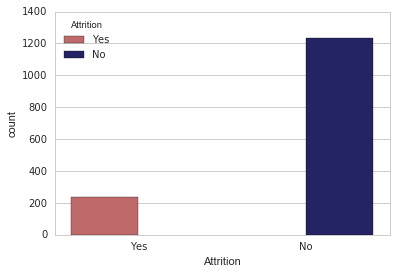

In [579]:
import plotly as py
sns.countplot(x="Attrition", hue="Attrition", data=empl, palette=["indianred", "midnightblue"])

Using density plots we plotted four features that we thought were interesting; Age, MonthlyIncome, PercentSalaryHike and DistanceFromHome. From these plots we realized that age, monthly income and distance from home will be important features for our classifications since the distributions between the employees who left and those who stayed are dissimilar. For this specific company we discovered that on average the employees lost are younger, have lower monthly incomes than those who stay, and have longer commute distances. 

DescribeResult(nobs=237, minmax=(18, 58), mean=33.607594936708864, variance=93.883501394550521, skewness=0.7111944489883134, kurtosis=-0.08105741100884689) 
 DescribeResult(nobs=1233, minmax=(18, 60), mean=37.561232765612324, variance=79.002943933600875, skewness=0.40762502727016825, kurtosis=-0.4150290002784116)


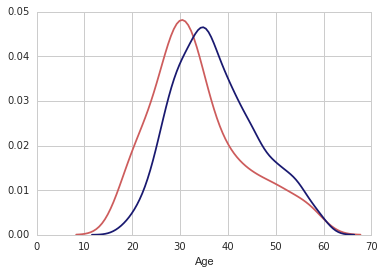

In [566]:
sns.distplot(attrYes['Age'], hist = False, color = "indianred");
sns.distplot(attrNo['Age'], hist = False, color = "midnightblue");

print(stats.describe(attrYes['Age']), '\n',
stats.describe(attrNo['Age']))

DescribeResult(nobs=237, minmax=(1009, 19859), mean=4787.0928270042195, variance=13251131.516770363, skewness=1.908966310070742, kurtosis=4.068929804278029) 
 DescribeResult(nobs=1233, minmax=(1051, 19999), mean=6832.7396593673966, variance=23215128.338823583, skewness=1.2846660875596987, kurtosis=0.664057751851538)


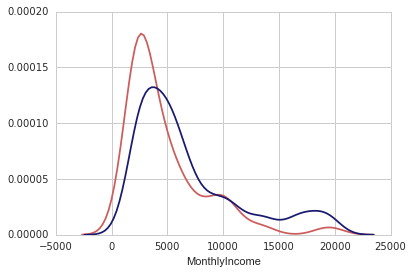

In [567]:
sns.distplot(attrYes['MonthlyIncome'], hist = False, color = "indianred");
sns.distplot(attrNo['MonthlyIncome'], hist = False, color = "midnightblue");

print(stats.describe(attrYes['MonthlyIncome']), '\n',
stats.describe(attrNo['MonthlyIncome']))

DescribeResult(nobs=237, minmax=(11, 25), mean=15.09704641350211, variance=14.215118358006151, skewness=0.8542459920979157, kurtosis=-0.3347356201144156) 
 DescribeResult(nobs=1233, minmax=(11, 25), mean=15.231143552311435, variance=13.246042278888995, skewness=0.8143500401576934, kurtosis=-0.29601696444233117)


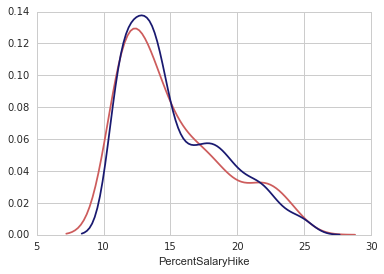

In [573]:
sns.distplot(attrYes['PercentSalaryHike'], hist = False, color = "indianred");
sns.distplot(attrNo['PercentSalaryHike'], hist = False, color = "midnightblue");

print(stats.describe(attrYes['PercentSalaryHike']), '\n',
stats.describe(attrNo['PercentSalaryHike']))

DescribeResult(nobs=237, minmax=(1, 29), mean=10.632911392405063, variance=71.445183437030678, skewness=0.6318715334830777, kurtosis=-0.8674734233081853) 
 DescribeResult(nobs=1233, minmax=(1, 29), mean=8.9156528791565286, variance=64.202295372915799, skewness=1.0278532177701256, kurtosis=-0.049035971751739904)


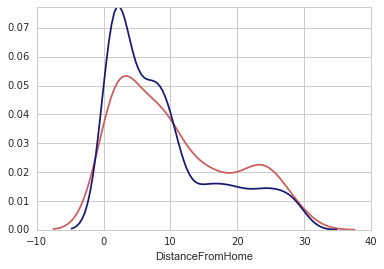

In [571]:
sns.distplot(attrYes['DistanceFromHome'], hist = False, color = "indianred");
sns.distplot(attrNo['DistanceFromHome'], hist = False, color = "midnightblue");

print(stats.describe(attrYes['DistanceFromHome']), '\n',
stats.describe(attrNo['DistanceFromHome']))

We were also interested in the following categorial and ordinal features; OverTime, JobLevel,  JobInvolvement, and EnvironmentSatisfaction. We discovered that from the population of employees lost in attrition a larger percentage works overtime and work in lower job levels, are less involved in their jobs and are less satisfied with their work environment than those who stayed. 

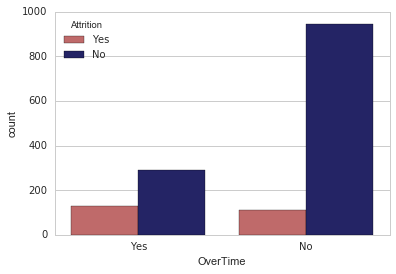

In [574]:
sns.countplot(x="OverTime", hue="Attrition", data=empl, palette=["indianred", "midnightblue"]);

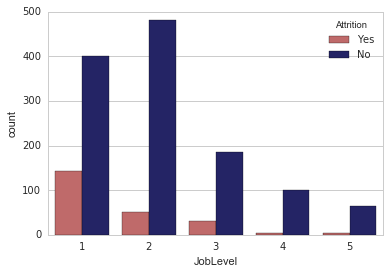

In [590]:
sns.countplot(x="JobLevel", hue="Attrition", data=empl, palette=["indianred","midnightblue"]);

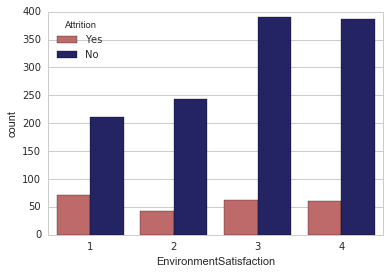

In [589]:
sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=empl, palette=["indianred", "midnightblue"]);

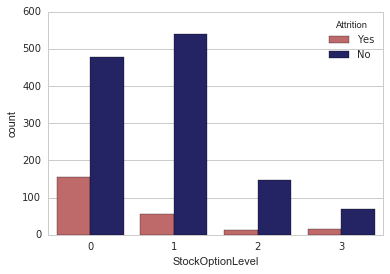

In [577]:
sns.countplot(x="StockOptionLevel", hue="Attrition", data=empl, palette=["indianred", "midnightblue"]);

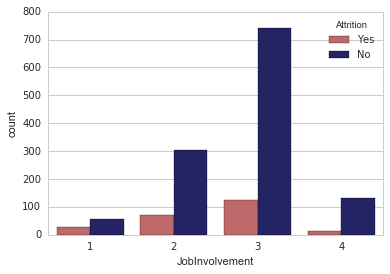

In [585]:
sns.countplot(x="JobInvolvement", hue="Attrition", data=empl, palette=["indianred", "midnightblue"]);